In [1]:
import tensorflow as tf
tf.__version__

'2.1.0'

## Load data

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) =  mnist.load_data()

## Explore data

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_labels, len(train_labels)

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8), 60000)

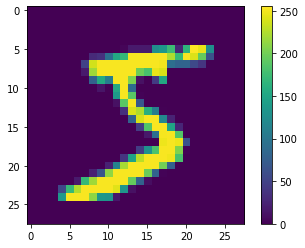

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Data Preparation: scaling

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

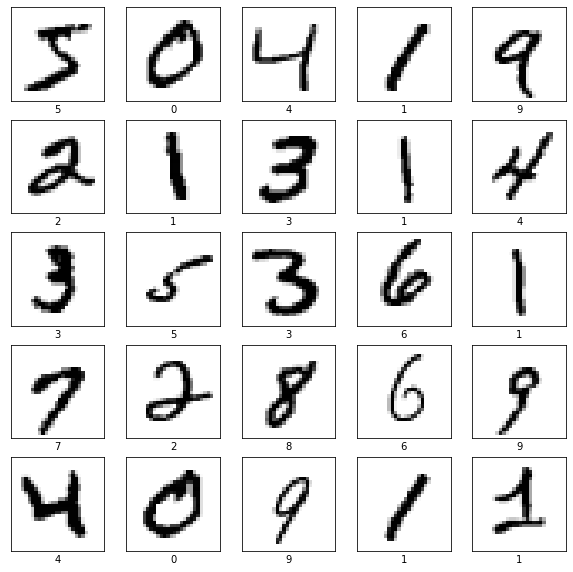

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

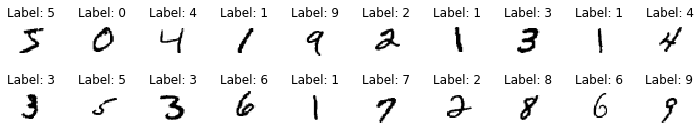

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# plot first 20 images
n = 20
_, axes = plt.subplots(2, 10, figsize=(10, 2))
plt.tight_layout()
for i in range(n):
    row, col = i // 10, i % 10
    axes[row, col].set_axis_off()
    axes[row, col].imshow(train_images[i,], cmap=plt.cm.binary, interpolation='nearest') # plt.cm.gray_r
    axes[row, col].set_title('Label: %i' % train_labels[i])

## Build CNN

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10)
    ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

In [11]:
model = build_model()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(train_images, train_labels, validation_split = 0.2, epochs=10, batch_size=32, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 131us/sample - loss: 0.0117 - accuracy: 0.9965 - val_loss: 0.0146 - val_accuracy: 0.9952
Epoch 2/10
48000/48000 [==============================] - 6s 128us/sample - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0159 - val_accuracy: 0.9945
Epoch 3/10
48000/48000 [==============================] - 6s 129us/sample - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0155 - val_accuracy: 0.9941
Epoch 4/10
48000/48000 [==============================] - 6s 133us/sample - loss: 0.0087 - accuracy: 0.9972 - val_loss: 0.0180 - val_accuracy: 0.9939
Epoch 5/10
48000/48000 [==============================] - 6s 131us/sample - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.0259 - val_accuracy: 0.9918
Epoch 6/10
48000/48000 [==============================] - 6s 130us/sample - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.0260 - val_accuracy: 0.9917
Epoch 7/10
48000/48000 [==========================

In [15]:
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.011727,0.996479,0.014623,0.995167,0
1,0.010506,0.996750,0.015870,0.994500,1
2,0.008212,0.997396,0.015461,0.994083,2
3,0.008700,0.997229,0.017992,0.993917,3
4,0.005811,0.998375,0.025884,0.991750,4
5,0.005280,0.998563,0.025961,0.991667,5
6,0.007107,0.997646,0.023985,0.992167,6
7,0.003757,0.999021,0.027792,0.992167,7
8,0.004868,0.998625,0.027519,0.991167,8
9,0.006223,0.997896,0.035825,0.989750,9


## Final fit model with full data & test model

In [16]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0131 - accuracy: 0.9962
Epoch 2/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0059 - accuracy: 0.9981
Epoch 3/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0071 - accuracy: 0.9976
Epoch 4/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0040 - accuracy: 0.9988
Epoch 5/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0050 - accuracy: 0.9983
Epoch 6/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0034 - accuracy: 0.9990
Epoch 7/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0056 - accuracy: 0.9981
Epoch 8/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0032 - accuracy: 0.9990
Epoch 9/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0051 - accuracy: 0.9983
Epoch

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 1s - loss: 0.1254 - accuracy: 0.9790


In [18]:
test_predictions = model.predict(test_images)

In [19]:
test_predictions

array([[-17.579739  , -20.845644  , -11.163173  , ...,  21.890903  ,
        -22.072456  ,   0.7514637 ],
       [  0.82158124,  -4.189785  ,  30.417181  , ..., -43.742504  ,
         -6.4957643 , -51.739513  ],
       [-20.614147  ,  15.104223  ,  -5.5836325 , ...,  -5.560277  ,
         -4.098689  , -20.706789  ],
       ...,
       [-47.21146   , -32.576996  , -36.468056  , ...,   5.7801695 ,
        -13.541751  ,   0.71862763],
       [ -8.148197  , -20.686018  , -33.679527  , ..., -17.169123  ,
          3.762741  , -41.65321   ],
       [-10.670267  , -35.335037  ,  -8.153226  , ..., -26.576292  ,
        -11.894642  , -29.491508  ]], dtype=float32)